<a href="https://www.kaggle.com/code/ahmedalaaelsayed/titanic-machine-learning-from-disaster?scriptVersionId=135464992" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Specify the path of the CSV file
old_output_file_path = 'submission.csv'

# Check if the file exists
if os.path.exists(old_output_file_path):
    # Delete the file
    os.remove(old_output_file_path)
    print("Old output file deleted successfully.")
else:
    print("There is no old output file.")

./.gitignore
./train.csv
./titanic-machine-learning-from-disaster.ipynb
./README.md
./test.csv
./LICENSE
./.git/config
./.git/packed-refs
./.git/HEAD
./.git/description
./.git/index
./.git/FETCH_HEAD
./.git/refs/remotes/origin/HEAD
./.git/refs/heads/master
./.git/objects/pack/pack-adac3dae754567e417912d774fdbd3f59fb3df3a.pack
./.git/objects/pack/pack-adac3dae754567e417912d774fdbd3f59fb3df3a.idx
./.git/info/exclude
./.git/logs/HEAD
./.git/logs/refs/remotes/origin/HEAD
./.git/logs/refs/heads/master
./.git/hooks/commit-msg.sample
./.git/hooks/pre-merge-commit.sample
./.git/hooks/fsmonitor-watchman.sample
./.git/hooks/push-to-checkout.sample
./.git/hooks/applypatch-msg.sample
./.git/hooks/pre-applypatch.sample
./.git/hooks/pre-receive.sample
./.git/hooks/update.sample
./.git/hooks/prepare-commit-msg.sample
./.git/hooks/pre-commit.sample
./.git/hooks/pre-rebase.sample
./.git/hooks/post-update.sample
./.git/hooks/pre-push.sample
There is no old output file.


In [26]:
from sklearn.model_selection import train_test_split

titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

# Get rid of any row with Survived=NaN
titanic_train.dropna(subset=['Survived'], inplace=True)

# The full training data before cleaning and handling
X = titanic_train.drop('Survived', axis=1)
y = titanic_train.Survived

full_X = X.copy()
full_y = y.copy()

# There is no need for the name or Ticket so i will drop them
X = X.drop(['Name', 'Ticket'], axis=1)
titanic_test_X = titanic_test.drop(['Name', 'Ticket'], axis=1)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


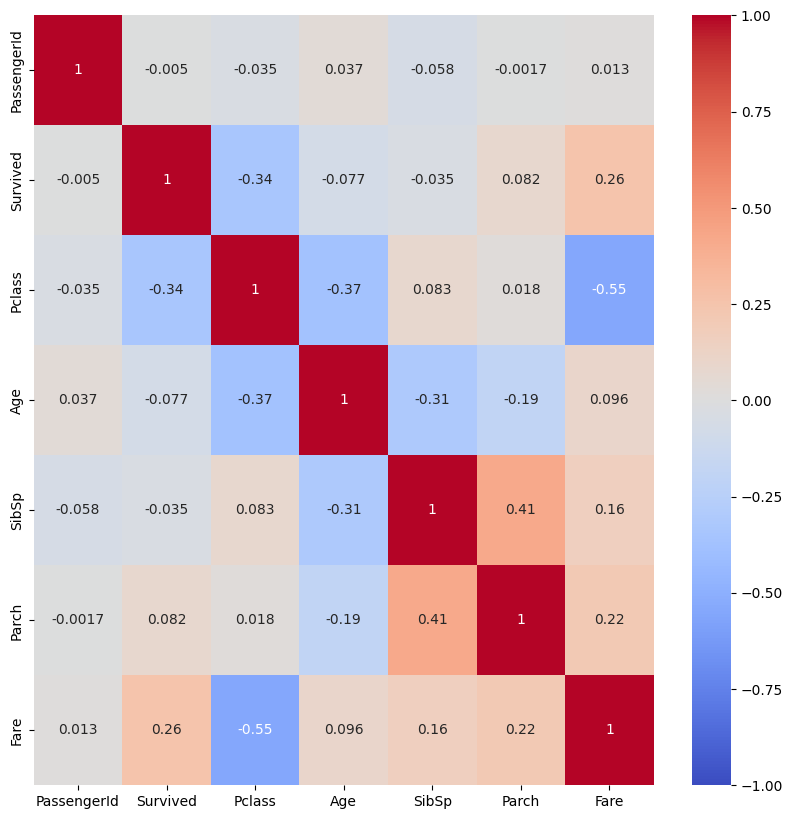

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = titanic_train.corr(numeric_only=True)
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

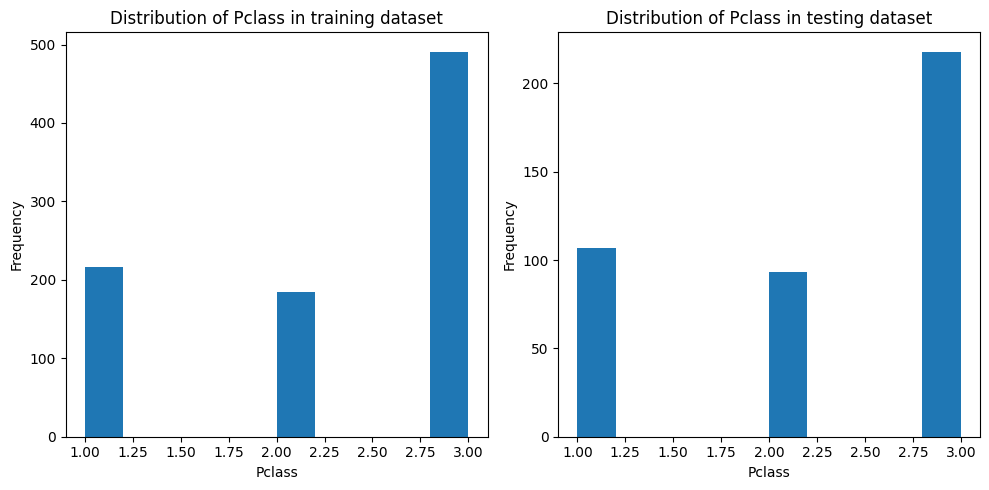

In [28]:
import matplotlib.pyplot as plt

# Show the distribution of the Pclass in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of the Pclass in training dataset
axes[0].hist(titanic_train.Pclass, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Pclass in training dataset')

# Plot 2 - Distribution of Pclass in testing dataset
axes[1].hist(titanic_test.Pclass, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Pclass in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

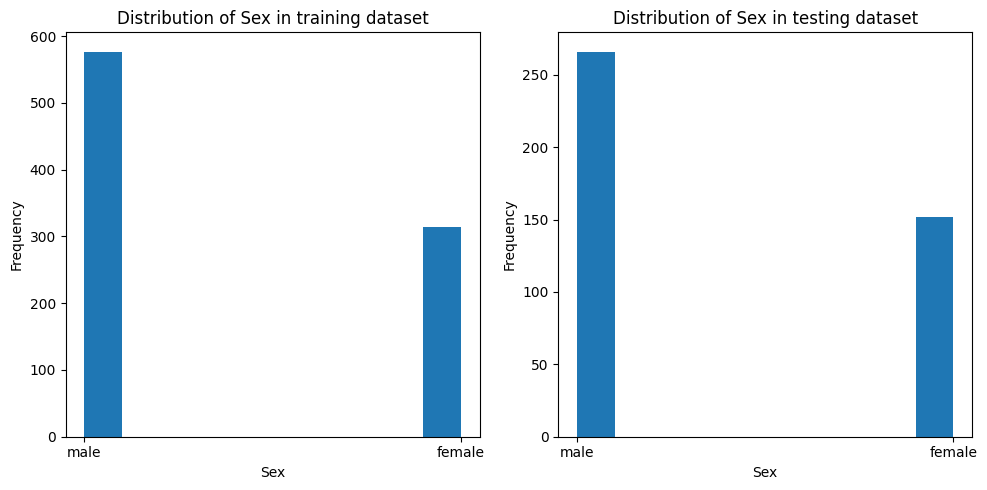

In [29]:
import matplotlib.pyplot as plt

# Show the distribution of the Sex in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of Sex in training dataset
axes[0].hist(titanic_train.Sex, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sex in training dataset')

# Plot 2 - Distribution of Sex in testing dataset
axes[1].hist(titanic_test.Sex, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Sex in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

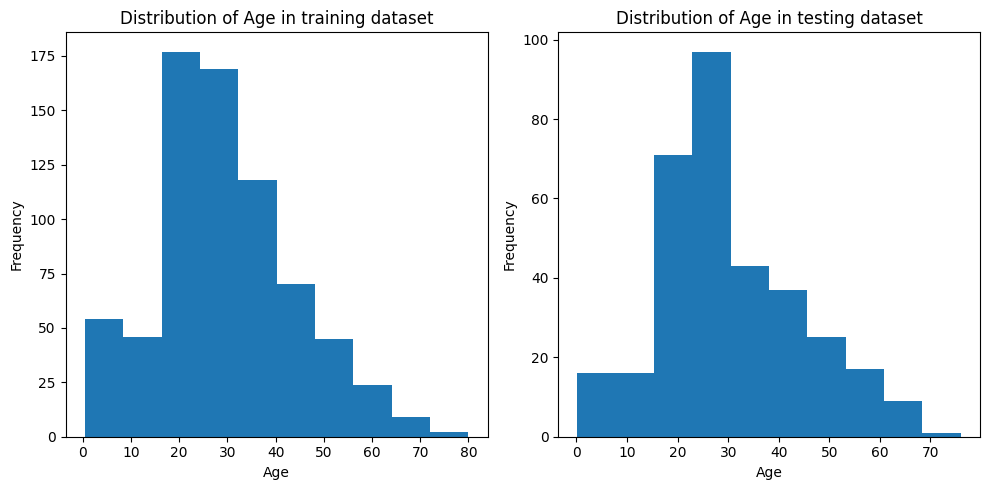

In [30]:
import matplotlib.pyplot as plt

# Show the distribution of the Age in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of the Age in training dataset
axes[0].hist(titanic_train.Age, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Age in training dataset')

# Plot 2 - Distribution of Age in testing dataset
axes[1].hist(titanic_test.Age, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Age in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

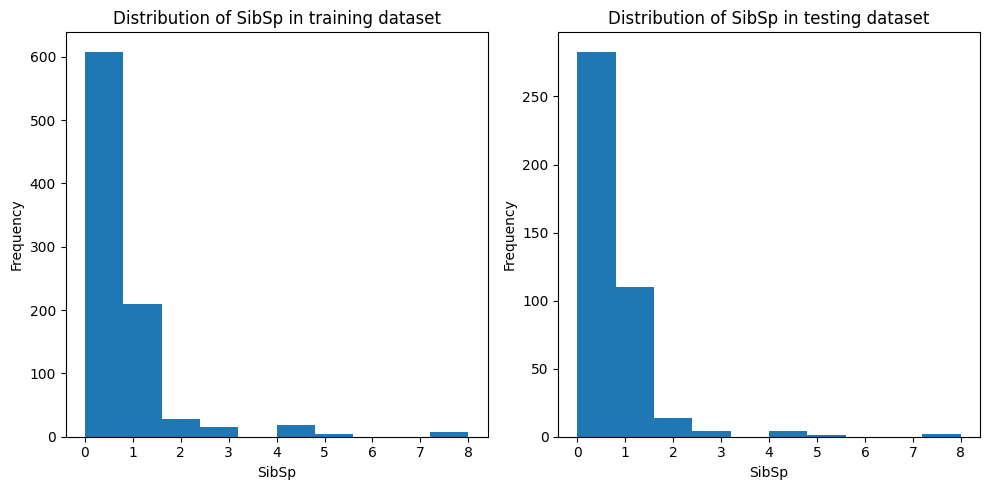

In [31]:
import matplotlib.pyplot as plt

# Show the distribution of the SibSp in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of the SibSp in training dataset
axes[0].hist(titanic_train.SibSp, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('SibSp')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SibSp in training dataset')

# Plot 2 - Distribution of SibSp in testing dataset
axes[1].hist(titanic_test.SibSp, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('SibSp')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of SibSp in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

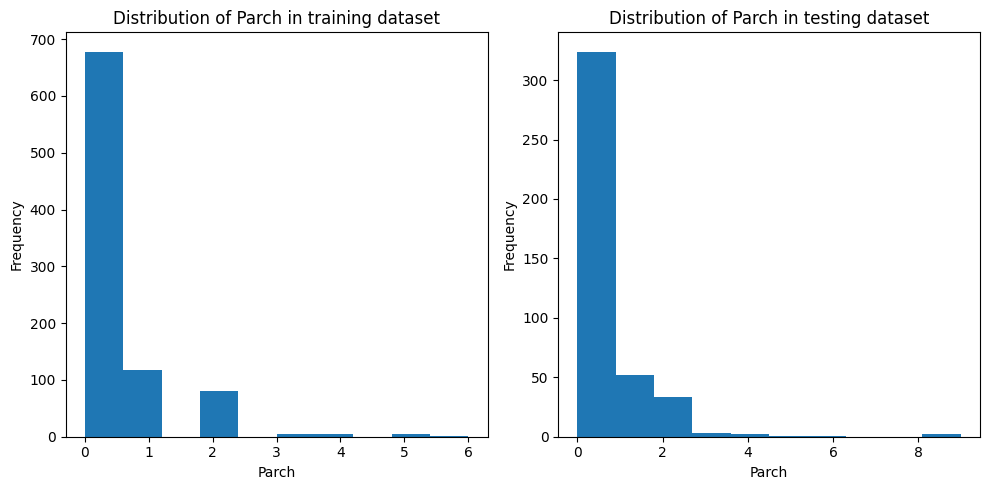

In [32]:
import matplotlib.pyplot as plt

# Show the distribution of the Parch in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of the Parch in training dataset
axes[0].hist(titanic_train.Parch, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Parch')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Parch in training dataset')

# Plot 2 - Distribution of Parch in testing dataset
axes[1].hist(titanic_test.Parch, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Parch')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Parch in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

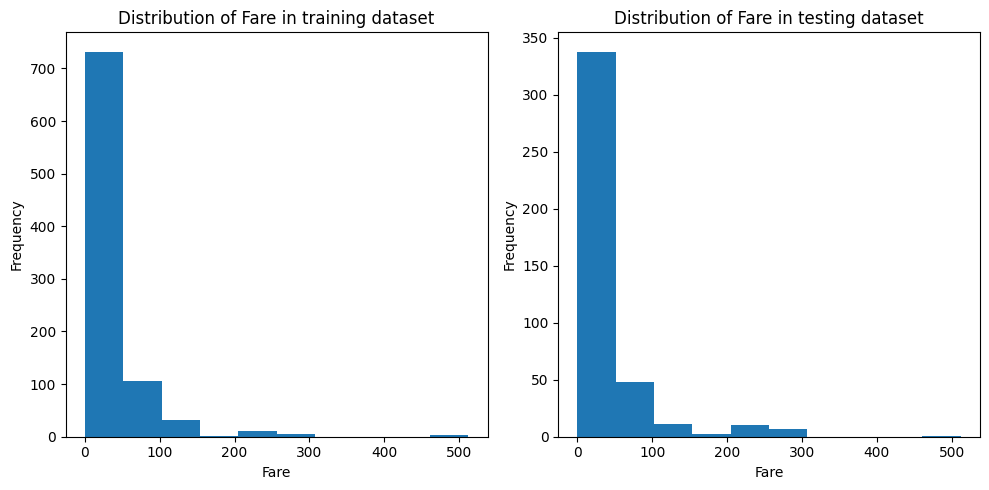

In [33]:
import matplotlib.pyplot as plt

# Show the distribution of the Fare in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of Fare in training dataset
axes[0].hist(titanic_train.Fare, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fare in training dataset')

# Plot 2 - Distribution of Fare in testing dataset
axes[1].hist(titanic_test.Fare, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Fare in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

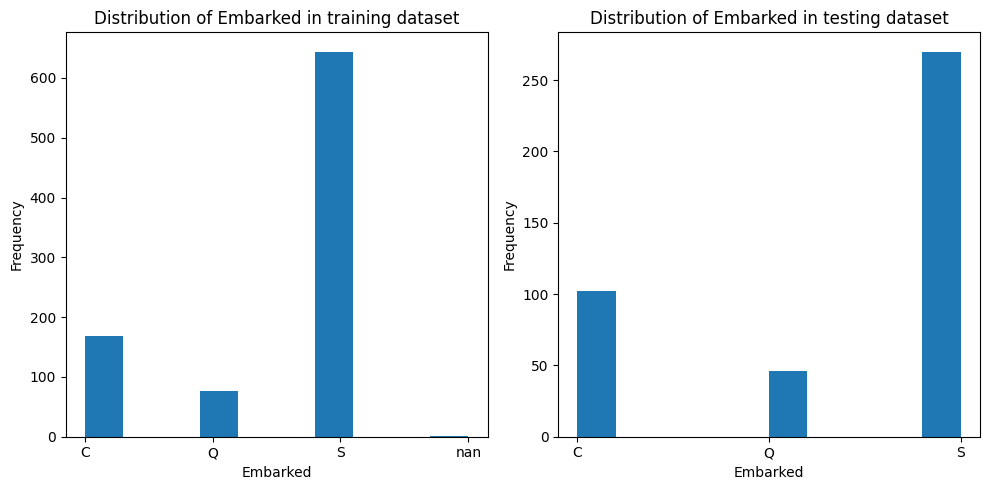

In [34]:
import matplotlib.pyplot as plt

# Show the distribution of the Embarked in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of Embarked in training dataset
axes[0].hist(titanic_train.Embarked.astype('str').sort_values(), bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Embarked')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Embarked in training dataset')

# Plot 2 - Distribution of Embarked in testing dataset
axes[1].hist(titanic_test.Embarked.astype('str').sort_values(), bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Embarked in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [35]:
# Get some info about the problems with the provided data
columns_with_missing_val = [col for col in X.columns if X[col].isnull().any()]
numerical_cols = [col for col in X.columns if not X[col].dtype == 'object']
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

print(columns_with_missing_val)
print(numerical_cols)
print(categorical_cols)

['Age', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Cabin', 'Embarked']


In [36]:
from sklearn.impute import SimpleImputer

# Preprocessing for numerical data by imputing the missing values with the median of the column has missing values
numerical_imputer = SimpleImputer(strategy='median')

numerical_imputed_X_train = pd.DataFrame(numerical_imputer.fit_transform(X_train[numerical_cols]))
numerical_imputed_X_valid = pd.DataFrame(numerical_imputer.transform(X_valid[numerical_cols]))

numerical_imputed_X_train.index = X_train[numerical_cols].index
numerical_imputed_X_valid.index = X_valid[numerical_cols].index

numerical_imputed_X_train.columns = X_train[numerical_cols].columns
numerical_imputed_X_valid.columns = X_valid[numerical_cols].columns

another_numerical_imputer = SimpleImputer(strategy='median')

numerical_imputed_full_X = pd.DataFrame(another_numerical_imputer.fit_transform(full_X[numerical_cols]))
numerical_imputed_test_X = pd.DataFrame(another_numerical_imputer.transform(titanic_test_X[numerical_cols]))

numerical_imputed_full_X.columns = full_X[numerical_cols].columns
numerical_imputed_test_X.columns = titanic_test_X[numerical_cols].columns

numerical_imputed_X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
140,141.0,3.0,29.0,0.0,2.0,15.2458
439,440.0,2.0,31.0,0.0,0.0,10.5000
817,818.0,2.0,31.0,1.0,1.0,37.0042
378,379.0,3.0,20.0,0.0,0.0,4.0125
491,492.0,3.0,21.0,0.0,0.0,7.2500


In [37]:
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for categorical data
# 1. Handle the missing data with the mode value for the columns has missing values
categorical_imputer = SimpleImputer(strategy='most_frequent')

categorical_imputed_X_train = pd.DataFrame(categorical_imputer.fit_transform(X_train[categorical_cols]))
categorical_imputed_X_valid = pd.DataFrame(categorical_imputer.transform(X_valid[categorical_cols]))

categorical_imputed_X_train.columns = X_train[categorical_cols].columns
categorical_imputed_X_valid.columns = X_valid[categorical_cols].columns

another_categorical_imputer = SimpleImputer(strategy='most_frequent')

categorical_imputed_full_X = pd.DataFrame(another_categorical_imputer.fit_transform(full_X[categorical_cols]))
categorical_imputed_test_X = pd.DataFrame(another_categorical_imputer.transform(titanic_test_X[categorical_cols]))

categorical_imputed_full_X.columns = full_X[categorical_cols].columns
categorical_imputed_test_X.columns = titanic_test_X[categorical_cols].columns

# 2. Handle the categorical variables by encoding it to one-hot vectors
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

categorical_imputed_encoded_X_train = pd.DataFrame(onehot_encoder.fit_transform(X_train[categorical_cols]))
categorical_imputed_encoded_X_valid = pd.DataFrame(onehot_encoder.transform(X_valid[categorical_cols]))

# One-hot encoding removed index; put it back
categorical_imputed_encoded_X_train.index = X_train[categorical_cols].index
categorical_imputed_encoded_X_valid.index = X_valid[categorical_cols].index

categorical_imputed_encoded_X_train.columns = categorical_imputed_encoded_X_train.columns.astype('str')
categorical_imputed_encoded_X_valid.columns = categorical_imputed_encoded_X_valid.columns.astype('str')

another_onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

categorical_imputed_encoded_full_X = pd.DataFrame(another_onehot_encoder.fit_transform(full_X[categorical_cols]))
categorical_imputed_encoded_test_X = pd.DataFrame(another_onehot_encoder.transform(titanic_test_X[categorical_cols]))

# One-hot encoding removed index; put it back
categorical_imputed_encoded_full_X.index = full_X[categorical_cols].index
categorical_imputed_encoded_test_X.index = titanic_test_X[categorical_cols].index

categorical_imputed_encoded_full_X.columns = categorical_imputed_encoded_full_X.columns.astype('str')
categorical_imputed_encoded_test_X.columns = categorical_imputed_encoded_test_X.columns.astype('str')

categorical_imputed_encoded_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
817,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
378,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
491,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [38]:
# Combine the numerical transformed columns with the categorical transformed columns
transformed_X_train = pd.concat([numerical_imputed_X_train, categorical_imputed_encoded_X_train], axis=1)
transformed_X_valid = pd.concat([numerical_imputed_X_valid, categorical_imputed_encoded_X_valid], axis=1)

transformed_full_X = pd.concat([numerical_imputed_full_X, categorical_imputed_encoded_full_X], axis=1)
transformed_test_X = pd.concat([numerical_imputed_test_X, categorical_imputed_encoded_test_X], axis=1)

transformed_X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,...,124,125,126,127,128,129,130,131,132,133
140,141.0,3.0,29.0,0.0,2.0,15.2458,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
439,440.0,2.0,31.0,0.0,0.0,10.5000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
817,818.0,2.0,31.0,1.0,1.0,37.0042,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
378,379.0,3.0,20.0,0.0,0.0,4.0125,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
491,492.0,3.0,21.0,0.0,0.0,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
transformed_X_valid.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', '0', '1', '2',
       '3',
       ...
       '124', '125', '126', '127', '128', '129', '130', '131', '132', '133'],
      dtype='object', length=140)

In [40]:
correlation_threshold = 0.0

corr = pd.concat([full_y, transformed_full_X], axis=1).corr(numeric_only=True)[['Survived']]
cols_with_impact = corr[abs(corr) >= correlation_threshold].dropna().index
cols_with_impact = list(set(cols_with_impact) - set(['Survived']))
cols_without_impact = list(set(corr.index) - set(cols_with_impact) - set(['Survived']))
transformed_full_X = transformed_full_X.loc[:,cols_with_impact]
transformed_test_X = transformed_test_X.loc[:,cols_with_impact]

corr = pd.concat([y_train, transformed_X_train], axis=1).corr(numeric_only=True)[['Survived']]
cols_with_impact = corr[abs(corr) >= correlation_threshold].dropna().index
cols_with_impact = list(set(cols_with_impact) - set(['Survived']))
cols_without_impact = list(set(corr.index) - set(cols_with_impact) - set(['Survived']))
transformed_X_train = transformed_X_train.loc[:,cols_with_impact]
transformed_X_valid = transformed_X_valid.loc[:,cols_with_impact]


In [41]:
def scorer(estimator, X, y):
    predictions = estimator.predict(X)
    return sum(predictions == y)/len(y)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def calculate_accuracy_model_1(X, y, n_estimators):
    # Define the model
    model_1 = RandomForestClassifier(n_estimators=n_estimators, random_state=0)

    # Evaluate the model
    score = cross_val_score(model_1, transformed_full_X, y, cv=10, scoring=scorer).mean()

    print("For ", n_estimators, " n_estimators, Accuracy =", score * 100)
    
    return (score * 100)

In [43]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

def calculate_accuracy_model_2(X_train, y_train, X_valid, y_valid, param_grid):
    # Create an XGBoost model
    model_2 = XGBClassifier()

    # Use GridSearchCV to find the optimal hyperparameters
    cv_strat = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    grid_search = GridSearchCV(estimator=model_2, param_grid=param_grid, cv=cv_strat, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)

    # Print the best hyperparameters
    print("\n", grid_search.best_params_)
    
    return grid_search.best_params_

In [44]:
from sklearn.neighbors import KNeighborsClassifier

def calculate_accuracy_model_3(X, y, k):
    # Define the model
    model_3 = KNeighborsClassifier(n_neighbors=k)
    
    # Evaluate the model
    score = cross_val_score(model_3, X, y, cv=10, scoring=scorer).mean()

    print("For ", k, " neighbours, Accuracy =", score * 100)
    
    return (score * 100)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

def calculate_accuracy_model_4(X, y, n_estimators, learning_rate):
    # Define the model
    model_4 = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    
    # Evaluate the model
    score = cross_val_score(model_4, X, y, cv=10, scoring=scorer).mean()
    
    print("For ", n_estimators, " n_estimators, Accuracy =", score * 100)
    
    return (score * 100)

In [46]:
# Finding the best parameters for model 1 : RandomForestClassifier
rfc_scores = [0.0]
rfc_optimal_n_estimators = 50
for n_estimators in range(50, 1050, 50):
    temp_score = calculate_accuracy_model_1(transformed_full_X, y, n_estimators)
    if temp_score > max(rfc_scores):
        rfc_optimal_n_estimators = n_estimators
    rfc_scores.append(temp_score)
    
rfc_scores.pop(0)
print("\nBest Accuracy:", max(rfc_scores), ', with optimal n_estimator =', rfc_optimal_n_estimators)

For  50  n_estimators, Accuracy = 83.05243445692882
For  100  n_estimators, Accuracy = 82.94257178526841
For  150  n_estimators, Accuracy = 82.71660424469414
For  200  n_estimators, Accuracy = 82.71535580524343
For  250  n_estimators, Accuracy = 82.71785268414482
For  300  n_estimators, Accuracy = 83.05368289637953
For  350  n_estimators, Accuracy = 82.83021223470661
For  400  n_estimators, Accuracy = 82.82896379525593
For  450  n_estimators, Accuracy = 83.27840199750312
For  500  n_estimators, Accuracy = 82.94132334581772
For  550  n_estimators, Accuracy = 83.27840199750312
For  600  n_estimators, Accuracy = 83.16604244694132
For  650  n_estimators, Accuracy = 83.16604244694133
For  700  n_estimators, Accuracy = 83.16604244694133
For  750  n_estimators, Accuracy = 83.16604244694133
For  800  n_estimators, Accuracy = 83.27840199750312
For  850  n_estimators, Accuracy = 83.27840199750312
For  900  n_estimators, Accuracy = 83.16604244694132
For  950  n_estimators, Accuracy = 83.166042446

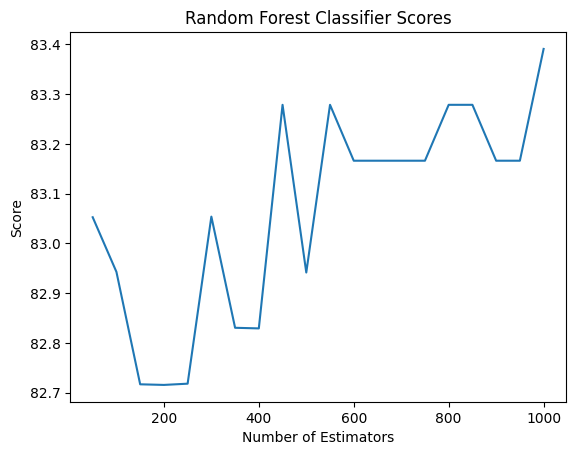

In [47]:
import matplotlib.pyplot as plt

# Plot the scores against the number of estimators
n_estimators_range = range(50, 1050, 50)
plt.plot(n_estimators_range, rfc_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Random Forest Classifier Scores')
plt.show()

In [48]:
# Finding the best parameters for model 1 : XGBClassifier

# Define the hyperparameters to be tuned
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 3, 5, 7],
    'n_estimators': [50, 100, 150, 200],
    'colsample_bytree': [ 0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],
    'min_child_weight': [1, 3, 5, 7 ],
    'early_stopping_rounds': [10, 15, 20]
}

# best_param = calculate_accuracy_model_2(transformed_X_train, y_train, transformed_X_valid, y_valid, param_grid)

In [49]:
best_param = {
    "colsample_bytree": 1.0,
    "early_stopping_rounds": 20,
    "learning_rate": 0.05,
    "max_depth": 7,
    "min_child_weight": 3,
    "n_estimators": 100,
    "reg_alpha": 0
}

In [50]:
# Finding the best parameters for model 1 : KNN
knn_scores = [0.0]
optimal_k_value = 1
for k in range(1, 200, 2):
    temp_score = calculate_accuracy_model_3(transformed_full_X, y, k)
    if temp_score > max(knn_scores):
        optimal_k_value = k
    knn_scores.append(temp_score)
    
knn_scores.pop(0)
print("\nBest Accuracy:", max(knn_scores), ', with optimal K =', optimal_k_value)

For  1  neighbours, Accuracy = 48.93882646691636
For  3  neighbours, Accuracy = 49.16604244694132
For  5  neighbours, Accuracy = 50.398252184769035
For  7  neighbours, Accuracy = 52.75156054931336
For  9  neighbours, Accuracy = 55.099875156054935
For  11  neighbours, Accuracy = 54.993757802746565
For  13  neighbours, Accuracy = 57.014981273408225
For  15  neighbours, Accuracy = 57.235955056179776
For  17  neighbours, Accuracy = 58.24594257178527
For  19  neighbours, Accuracy = 59.36953807740325
For  21  neighbours, Accuracy = 60.71785268414482
For  23  neighbours, Accuracy = 61.2796504369538
For  25  neighbours, Accuracy = 62.0661672908864
For  27  neighbours, Accuracy = 62.0661672908864
For  29  neighbours, Accuracy = 63.41448189762797
For  31  neighbours, Accuracy = 63.63920099875157
For  33  neighbours, Accuracy = 63.86392009987516
For  35  neighbours, Accuracy = 64.20099875156055
For  37  neighbours, Accuracy = 64.42571785268414
For  39  neighbours, Accuracy = 64.65043695380774
For

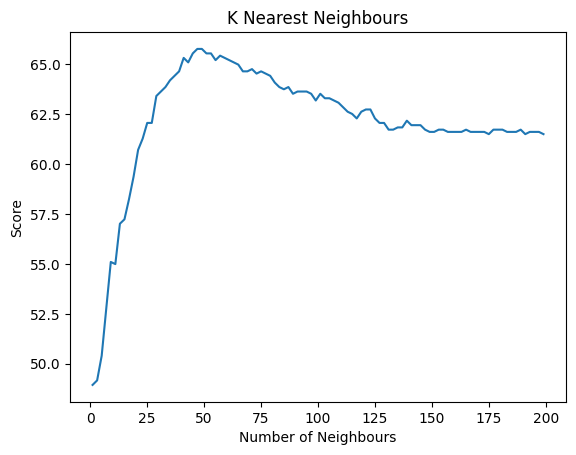

In [51]:
import matplotlib.pyplot as plt

# Plot the scores against the number of KNN with different k
k_range = range(1, 200, 2)
plt.plot(k_range, knn_scores)
plt.xlabel('Number of Neighbours')
plt.ylabel('Score')
plt.title('K Nearest Neighbours')
plt.show()

In [52]:
# Finding the best parameters for model 1 : GradientBoostingClassifier
gbc_scores = [0.0]
gbc_optimal_n_estimators = 50
gbc_chosen_learning_rate = 0.05
for n_estimators in range(50, 1050, 50):
    temp_score = calculate_accuracy_model_4(transformed_full_X, y, n_estimators, gbc_chosen_learning_rate)
    if temp_score > max(gbc_scores):
        gbc_optimal_n_estimators = n_estimators
    gbc_scores.append(temp_score)
    
gbc_scores.pop(0)
print("\nBest Accuracy:", max(gbc_scores), ', with optimal n_estimator =', gbc_optimal_n_estimators)

For  50  n_estimators, Accuracy = 81.82147315855181
For  100  n_estimators, Accuracy = 82.04369538077403
For  150  n_estimators, Accuracy = 82.37952559300872
For  200  n_estimators, Accuracy = 82.60299625468164
For  250  n_estimators, Accuracy = 82.60299625468164
For  300  n_estimators, Accuracy = 82.71535580524343
For  350  n_estimators, Accuracy = 82.04244694132335
For  400  n_estimators, Accuracy = 82.71535580524343
For  450  n_estimators, Accuracy = 82.26591760299625
For  500  n_estimators, Accuracy = 81.93008739076154
For  550  n_estimators, Accuracy = 81.70536828963796
For  600  n_estimators, Accuracy = 81.70411985018727
For  650  n_estimators, Accuracy = 80.69538077403247
For  700  n_estimators, Accuracy = 80.13607990012484
For  750  n_estimators, Accuracy = 79.23470661672908
For  800  n_estimators, Accuracy = 78.45193508114856
For  850  n_estimators, Accuracy = 77.66167290886392
For  900  n_estimators, Accuracy = 78.90387016229712
For  950  n_estimators, Accuracy = 78.453183520

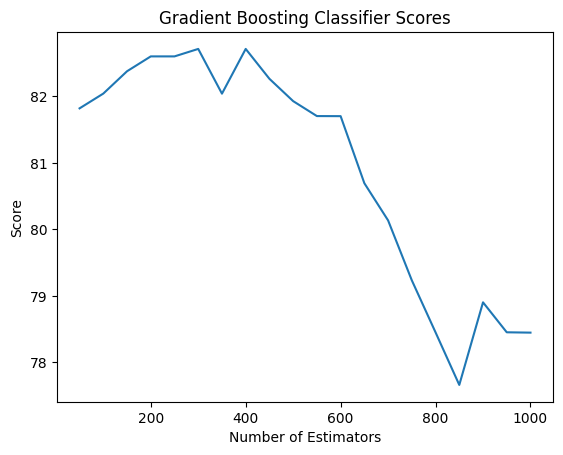

In [53]:
import matplotlib.pyplot as plt

# Plot the scores against the number of estimators
n_estimators_range = range(50, 1050, 50)
plt.plot(n_estimators_range, gbc_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Gradient Boosting Classifier Scores')
plt.show()

In [54]:
# Prepare the final model for submission
from sklearn.ensemble import VotingClassifier

# Define the model
estimators = []
estimators.append(('RF', RandomForestClassifier(n_estimators=rfc_optimal_n_estimators, random_state=0)))
estimators.append(('XGB', XGBClassifier(colsample_bytree=best_param['colsample_bytree'], 
                          learning_rate=best_param['learning_rate'],
                          max_depth=best_param['max_depth'],
                          min_child_weight=best_param['min_child_weight'],
                          n_estimators=best_param['n_estimators'],
                          reg_alpha=best_param['reg_alpha'],
                          random_state=0,
                          objective= 'binary:logistic')))
estimators.append(('GBC', GradientBoostingClassifier(n_estimators=gbc_optimal_n_estimators, learning_rate=gbc_chosen_learning_rate)))

final_model = VotingClassifier(estimators = estimators, voting ='hard')
final_model.fit(transformed_full_X, y)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=1000,
                                                     random_state=0)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=Non...
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None, min_child_weight=3,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=0, ...)),
                             ('GBC',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         n_estimators=300))])

In [55]:
# Save test predictions to file
preds_test = final_model.predict(transformed_test_X)
titanic_test.PassengerId = titanic_test.PassengerId.astype('Int32')
output = pd.DataFrame({'PassengerId': titanic_test.PassengerId,
                       'Survived': preds_test})
output.to_csv('submission.csv', index=False)

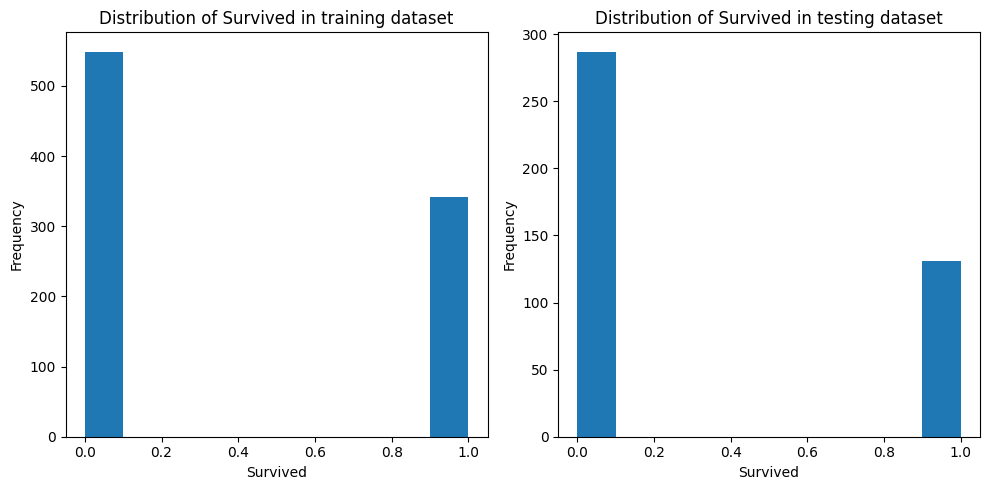

In [56]:
import matplotlib.pyplot as plt

# Show the distribution of the Survived in both training and testing dataset

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - Distribution of Survived in training dataset
axes[0].hist(y, bins=10)  # Adjust the number of bins as desired
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Survived in training dataset')

# Plot 2 - Distribution of Survived in testing dataset
axes[1].hist(preds_test, bins=10)  # Adjust the number of bins as desired
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Survived in testing dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()